# Functionality implementation

In [195]:
import random
from matplotlib import pyplot as plt
from pprint import pprint
# Sometimes we have more than one input to our objective function,
# here we split the chromosome into the corresponding solutions:
def split_chromosome(chromosome, items):
    solutions = ()
    l = len(chromosome)
    step = l // items
    return tuple(chromosome[index:(index+step)]
            for index in range(0, l, step)
           )

def get_precision(a, b, solution):
    return (b-a)/(2**len(solution) - 1)

# encoding and decoding solutions:
def decode_genes(a, b, solution):
    precision = get_precision(a, b, solution)
    return sum([b*2**i 
         for i, b in enumerate(reversed(solution))
        ]) * precision + a

# evaluate objective based on a solution's chromosome and inputs specs
def evaluate_objective(obj_func, chromosome, inputs, a, b):
    chroms = split_chromosome(chromosome, inputs)
    values = [decode_genes(a, b, chrom) for chrom in chroms]
    return obj_func(*values)

def gen_random_solution(l):
    return [1 if random.random() >= 0.5 else 0
            for _ in range(l)]

def create_random_population(N, l):
    return [gen_random_solution(l) for _ in range(N)]

def crossover_random(p_a, p_b):
    l = len(p_a) # we assume both parents have same chromosome length
    indexes = {i for i in range(l)}
    # select which genes will come from which parent
    p_a_genes = sorted(list(random.sample(indexes, l//2)))
    p_b_genes = sorted(list(indexes - set(p_a_genes)))
    child = []
    for i in indexes:
        child.append(p_a[i] if i in p_a_genes else p_b[i])
    # print(f'parent a: {p_a}')
    # print(f'parent b: {p_b}')
    # print(f'parent a genes: {p_a_genes}')
    # print(f'parent b genes: {p_b_genes}')
    # print(f'The baby: {child}')
    return child

# p_c means probability of crossover
def crossover_two_points(p_a, p_b, p_c = 1.0):
    if p_c >= random.random():
        l = len(p_a) # we assume both parents have same chromosome length
        indexes = {i for i in range(l)}
        # select which genes will come from which parent
        two_points = sorted(random.sample(indexes, 2))
        # print(f'two points: {two_points}')
        # extract segments from parent a
        first_seg_a = p_a[0:two_points[0]]
        mid_seg_a = p_a[two_points[0]:two_points[1]]
        last_seg_a = p_a[two_points[1]:]
        # extract segments from parent b
        first_seg_b = p_b[0:two_points[0]]
        mid_seg_b = p_b[two_points[0]:two_points[1]]
        last_seg_b = p_b[two_points[1]:]
        # create child # 1
        child = first_seg_a + mid_seg_b + last_seg_a
        child_2 = first_seg_b + mid_seg_a + last_seg_b
        # print(f'parent a: {p_a}')
        # print(f'parent b: {p_b}')
        # print(f'baby 1:   {child}')
        # print(f'baby 2:   {child_2}')
        return child, child_2
    else:
        #print('ugly people, no crossover performed')
        return p_a, p_b # no crossover, same childs as parents

def mutate_child(child, p_m):
    return [
        gen if random.random() > p_m else (1 - gen)
            for gen in child
    ]

# select an individual from the population,
# picking the best of k individuals from a tournament
def selection(population, k, objective, inputs, a, b):
    # Father tournament
    contestants = random.sample(list(enumerate(population)), k)
    i, father = min(contestants, 
                 key= lambda contestant: 
                     evaluate_objective(objective, 
                                        contestant[1], 
                                        inputs, a, b))
    return i, father

# para mostrar los valores objetivo (y) vs los # de generacion (x) en una grafica chida
def display_generations(obj_func, generations_list, inputs, a, b):
    N = len(generations_list[0]) # tamaño de cada poblacion
    # crea lista de individuos, asignandoles su # de generacion
    genealogy = [
        (i, evaluate_objective(obj_func, specimen, inputs, a, b))
        for i, gen in enumerate(generations)
            for specimen in gen
    ]
    x, y = zip(*genealogy)
    plt.scatter(x, y)
    plt.show()
    
#OBJECTIVE FUNCTIONS
def himmelblau(x, y):
    return ((x**2)+y-11)**2+(x+(y**2)-7)**2
def obj_fun_3(x):
    return (x/10)**5-5*(x/10)**4+5*(x/10)**3+5*(x/10)**2-6*(x/10)-1

# Functionality testing

In [131]:
solution = [0, 0, 0, 0]
a = -16
b = 16
decode_genes(a, b, solution)

-16.0

In [132]:
s = gen_random_solution(20) # este es el genotipo
print(f'genotipo = {s}')
a = -6
b = 6
p = get_precision(a, b, s)
v = decode_genes(a, b, s) # este es el fenotipo
print(f'fenotipo = {v}')
print(f'precision = {p}')

genotipo = [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1]
fenotipo = 5.836463772262356
precision = 1.144410271082183e-05


In [133]:
p_a = gen_random_solution(10)
p_b = gen_random_solution(10)
child = crossover_random(p_a, p_b)
monster = mutate_child(child, 0.01)
if child == monster:
    print('No mutation has occured')
else:
    print('A mutation has occured!')
    print(f'new baby: {monster}')

parent a: [0, 0, 0, 1, 1, 1, 0, 1, 0, 1]
parent b: [1, 1, 0, 0, 0, 0, 0, 0, 1, 0]
parent a genes: [0, 4, 5, 6, 7]
parent b genes: [1, 2, 3, 8, 9]
The baby: [0, 1, 0, 0, 1, 1, 0, 1, 1, 0]
No mutation has occured


In [134]:
max(['a', 'b', 'hi'], key= lambda item: len(item))

'hi'

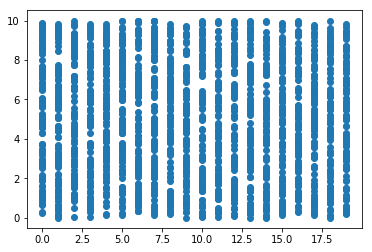

In [135]:
# Testing population generation and final representation:
# genetic algorithm parameters
a = 0
b = 10
M = 100 # Population size
N = 20 # Number of generations
p_c = 0.5 # Probability of crossover (Top 10 anime...)
p_m = 0.1 # Probability of mutation
k = 3 # Number of tournament contestants
l = 8 # Solution precision (Number of alleles per Chromosome)
generations = [[gen_random_solution(l) 
                 for _ in range(M)] # specimens per generation
                    for _ in range(N)] # generations]
genealogy = [
    (i, decode_genes(a, b, specimen))
    for i, gen in enumerate(generations)
        for specimen in gen
]
display_generations(a, b, genealogy)

In [136]:
popu = [gen_random_solution(l) for _ in range(N)]
list(enumerate(popu))

[(0, [1, 1, 0, 1, 0, 0, 0, 1]),
 (1, [0, 1, 0, 1, 0, 1, 0, 1]),
 (2, [1, 1, 0, 1, 1, 1, 1, 0]),
 (3, [1, 0, 0, 0, 0, 0, 0, 0]),
 (4, [0, 1, 1, 1, 0, 0, 0, 0]),
 (5, [0, 1, 0, 1, 1, 1, 0, 1]),
 (6, [0, 1, 0, 1, 1, 0, 1, 0]),
 (7, [0, 1, 0, 0, 1, 1, 1, 0]),
 (8, [1, 0, 0, 1, 0, 0, 1, 1]),
 (9, [0, 1, 1, 1, 0, 1, 0, 0]),
 (10, [1, 1, 0, 1, 1, 0, 1, 1]),
 (11, [0, 1, 1, 0, 1, 1, 1, 0]),
 (12, [0, 0, 0, 1, 0, 1, 1, 0]),
 (13, [1, 0, 0, 0, 0, 1, 1, 0]),
 (14, [1, 1, 1, 1, 0, 0, 1, 0]),
 (15, [1, 0, 1, 0, 1, 0, 1, 1]),
 (16, [0, 1, 1, 0, 1, 0, 0, 0]),
 (17, [1, 0, 1, 1, 1, 0, 0, 0]),
 (18, [1, 1, 1, 0, 0, 0, 1, 0]),
 (19, [1, 0, 1, 1, 1, 0, 0, 1])]

In [143]:
print('olde pop: ')
pprint(popu)
i, fath = selection(popu, k, obj_fun_3, 1, a, b)
print(f'parent a index: {i}')
popu.pop(i)
j, moth = selection(popu, k, obj_fun_3, 1, a, b)
print(f'parent b index: {j}')
popu.insert(i, fath)
child = crossover_random(fath, moth)
monster = mutate_child(child, 0.05)
print('new pop: ')
pprint(popu)

olde pop: 
[[1, 1, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 1, 0, 1, 0],
 [0, 1, 0, 0, 1, 1, 1, 0],
 [1, 0, 0, 1, 0, 0, 1, 1],
 [0, 1, 1, 1, 0, 1, 0, 0],
 [1, 1, 0, 1, 1, 0, 1, 1],
 [0, 1, 1, 0, 1, 1, 1, 0],
 [0, 0, 0, 1, 0, 1, 1, 0],
 [1, 1, 1, 1, 0, 0, 1, 0],
 [0, 1, 1, 0, 1, 0, 0, 0],
 [1, 0, 1, 1, 1, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 1, 0],
 [1, 0, 1, 1, 1, 0, 0, 1],
 [0, 1, 0, 1, 1, 1, 0, 1],
 [1, 0, 0, 0, 0, 1, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 1],
 [0, 1, 1, 1, 0, 0, 0, 0]]
parent a index: 6
parent b index: 8
parent a: [1, 0, 0, 1, 0, 0, 1, 1]
parent b: [0, 1, 1, 0, 1, 1, 1, 0]
parent a genes: [2, 3, 4, 5]
parent b genes: [0, 1, 6, 7]
The baby: [0, 1, 0, 1, 0, 0, 1, 0]
new pop: 
[[1, 1, 0, 1, 0, 0, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 1, 0, 1, 0],
 [0, 1, 0, 0, 1, 1, 1, 0],
 [1, 0, 0, 1, 0, 0, 1, 1],
 [0, 1, 1, 1, 0, 1, 0, 0],
 [1, 1, 0, 1, 1, 0, 1, 1

In [97]:
father_feno = decode_genes(a, b, fath)
mother_feno = decode_genes(a, b, moth)
child_feno = decode_genes(a, b, child)
monster_feno = decode_genes(a, b, monster)
print(f'solution precision: {get_precision(a, b, fath)}')
print(f'father: {father_feno} => {obj_fun_3(father_feno)}')
print(f'mother: {mother_feno} => {obj_fun_3(mother_feno)}')
print(f'child: {child_feno} => {obj_fun_3(child_feno)}')
print(f'monst: {monster_feno} => {obj_fun_3(monster_feno)}')

solution precision: 0.0392156862745098
father: 4.784313725490196 => -2.4154502784660243
mother: 2.4705882352941178 => -2.1194704422205897
child: 9.042033235581624 => -1.3787991414736567
monst: 9.042033235581624 => -1.3787991414736567


In [36]:
list(range(0, 20, 10))

[0, 10]

In [37]:
'hola mundo 1234567890'[0:10]
# 'hola mundo 1234567890'[10:20]

'hola mundo'

In [38]:
# probando nuestro código para el caso de 2 inputs (himmelblau function)
x, y = split_chromosome(popu[6], 2)
a = -6
b = 6
himmelblau(
    decode_genes(a, b, x),
    decode_genes(a, b, y)
)

890.0

In [39]:
crossover_two_points(popu[2], popu[4], 0.8)

two points: [3, 6]
parent a: [1, 0, 1, 0, 0, 1, 0, 1]
parent b: [1, 1, 0, 1, 1, 1, 0, 0]
baby 1:   [1, 0, 1, 1, 1, 1, 0, 1]
baby 2:   [1, 1, 0, 0, 0, 1, 0, 0]


([1, 0, 1, 1, 1, 1, 0, 1], [1, 1, 0, 0, 0, 1, 0, 0])

In [45]:
s = gen_random_solution(20)
r = [0, 0, 0, 0, 0, 0, 0, 0]

In [46]:
s

[1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1]

In [47]:
decode_genes(-6, 6, r)

-6.0

In [48]:
x, y = [decode_genes(-6, 6, gen) for gen in split_chromosome(s, 2)]

In [49]:
himmelblau(x, y)

4.255651972952148

In [50]:
split_chromosome(s, 3)

([1, 1, 0, 0, 0, 1], [1, 0, 0, 0, 1, 0], [1, 0, 1, 1, 0, 0], [1, 1])

In [51]:
crossover_random(popu[0], popu[1])

parent a: [1, 1, 1, 0, 0, 0, 1, 0]
parent b: [1, 1, 1, 0, 1, 1, 0, 1]
parent a genes: [0, 2, 3, 7]
parent b genes: [1, 4, 5, 6]
The baby: [1, 1, 1, 0, 1, 1, 0, 0]


[1, 1, 1, 0, 1, 1, 0, 0]

In [52]:
ch_1, ch_2 = crossover_two_points(popu[0], popu[1])

two points: [0, 7]
parent a: [1, 1, 1, 0, 0, 0, 1, 0]
parent b: [1, 1, 1, 0, 1, 1, 0, 1]
baby 1:   [1, 1, 1, 0, 1, 1, 0, 0]
baby 2:   [1, 1, 1, 0, 0, 0, 1, 1]


In [53]:
mutate_child(ch_1, 0.01)

[1, 1, 1, 0, 1, 1, 0, 0]

In [64]:
evaluate_objective(himmelblau, popu[3], inputs, a, b)

270.4289618721537

In [87]:
selection(popu, 15, himmelblau, 2, -6, 6)

(1,
 [0,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1])

In [190]:
objectives = [evaluate_objective(obj_fun_3, chrom, 1, -10, 30) for chrom in popu]
objectives

[0.9286255508122876,
 -2.220172197514093,
 0.09951486613795701,
 -0.332868505086406,
 0.3886904342691242,
 -1.8662655929864886,
 -4.2370598612262995,
 -2.7968194055297886,
 -1.6363220844859971,
 -0.3340600052137752,
 -1.454428873076683,
 -3.1814664197275064,
 1.8089529870884045,
 -0.0841252131600898,
 -1.3607659550226554,
 1.0877652667373114,
 0.40146917445797037,
 -3.676104053202833,
 -4.495467159683585,
 -4.399575311463039,
 -2.416732511254173,
 -0.2828394422392728,
 -0.5247313609815576,
 -1.2884366422082603,
 -0.5077692241148011,
 -1.9014629654891044,
 2.0081957869443343,
 -1.7403555901275407,
 -3.8478599682734203,
 -3.82234556922446,
 0.2516782311619572,
 0.36163497267336275,
 -2.487095382944972,
 -4.56590319611081,
 -0.37630134227062595,
 -4.211065402338669,
 -0.771270190214322,
 2.601815501480814,
 -2.1573516388785396,
 -1.9196081667473694,
 -1.0458311823034026,
 -1.727589140011717,
 -0.1915082495781455,
 -1.1766243411247288,
 -1.4382151621034733,
 0.4177644667436642,
 -1.6865648

## Problema a resolver:
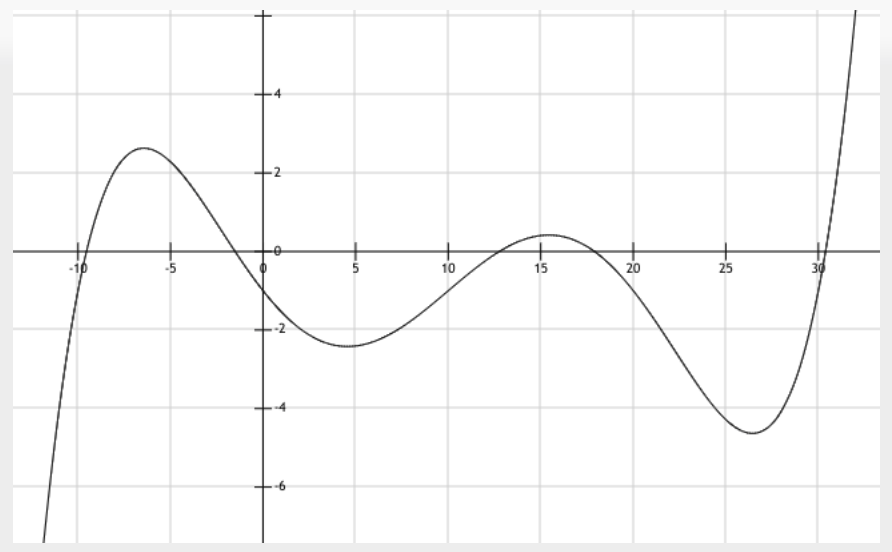

best for first generation is: [0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0]
value = -2.4145368103326152
Generation #1:
Generation #2:
Generation #3:
Generation #4:
Generation #5:
Generation #6:
Generation #7:
Generation #8:
Generation #9:
Generation #10:
Generation #11:
Generation #12:
Generation #13:
Generation #14:
Generation #15:
Generation #16:
Generation #17:
Generation #18:
Generation #19:
Generation #20:
best for last generation is: [1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0]
value = -4.24107047203019
solution values: [24.911416658269097]


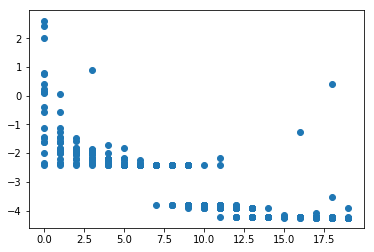

In [282]:
# THE REAL DEAL:
# genetic algorithm parameters
M = 20 # Population size
N = 20 # Number of generations
p_c = 0.95 # Probability of crossover (Top 10 anime...)
p_m = 0.005 # Probability of mutation
k = 3 # Number of tournament contestants
l = 60 # Solution precision (Number of alleles per Chromosome)

# problem specific parameters:
a = -10 # minimum value for solution space
b = 30  # maximum value for solution space
inputs = 1 # number of inputs for this problem
objective = obj_fun_3

# Create initial population
popu = [gen_random_solution(l) for _ in range(M)]
# track del mejor por generacion
best_for_gen_x = [min(popu, key=lambda chrom: evaluate_objective(objective, 
                                                                 chrom, 
                                                                 inputs, a, b))]
print(f'best for first generation is: {best_for_gen_x[-1]}')
print(f'value = {evaluate_objective(objective, best_for_gen_x[-1], inputs, a, b)}')
# itera algoritmo por cada una de las generaciones
current_popu = popu
generations = []
for n in range(N):
    print(f'Generation #{n+1}:')
    # evalúa a esta generacion
    generations.append(current_popu)
    # crea siguiente generacion
    children = []
    for m in range(M//2):
        i, fath = selection(current_popu, k, objective, inputs, a, b)
        current_popu.pop(i)
        j, moth = selection(current_popu, k, objective, inputs, a, b)
        current_popu.insert(i, fath)
        ch_1, ch_2 = crossover_two_points(fath, moth, p_c)
        ch_1 = mutate_child(ch_1, p_m)
        ch_2 = mutate_child(ch_2, p_m)
        children.extend([ch_1, ch_2])
        # agrega el mejor hijo a la lista de mejores:
        best_child = min(children, 
                         key=lambda chrom: evaluate_objective(objective,
                                                          chrom,
                                                          inputs, a, b))
        best_for_gen_x.append(best_child)
    current_popu = children # avanza de generacion y repite
print(f'best for last generation is: {best_for_gen_x[-1]}')
print(f'value = {evaluate_objective(objective, best_for_gen_x[-1], inputs, a, b)}')
solution_chroms = split_chromosome(best_for_gen_x[-1], inputs)
solution_values = [decode_genes(a, b, chrom) for chrom in solution_chroms]
print(f'solution values: {solution_values}')
display_generations(objective, generations, inputs, a, b) 